In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!pip install opencv-python
!pip install Shapely

import sys
import shutil
import os
import cv2
import numpy as np

!wget "https://www.dropbox.com/s/z8ux8vw2l2cmq7k/Mask_RCNN_withRW.zip"
!unzip Mask_RCNN_withRW.zip

sys.path.append("/content/Mask_RCNN_withRW/mrcnn")
from m_rcnn import *
%matplotlib inline

TensorFlow 1.x selected.
     |████████████████████████████████| 2.9 MB 12.4 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
--2022-02-14 09:33:44--  https://www.dropbox.com/s/z8ux8vw2l2cmq7k/Mask_RCNN_withRW.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/z8ux8vw2l2cmq7k/Mask_RCNN_withRW.zip [following]
--2022-02-14 09:33:45--  https://www.dropbox.com/s/raw/z8ux8vw2l2cmq7k/Mask_RCNN_withRW.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd79877f5ff66bfa3ed8c60ada1.dl.dropboxusercontent.com/cd/0/inline/BfsnfMHQgJFLKEBEv3o7g5vtqwyGdxYSpyKVKs5qufXY6S-8vqPs77DcdZR3jOdc1t3M2mxb2wz6h3d7DKEaU1CrHgPLgwqpN51NbQ6xEy9

Using TensorFlow backend.


Create zip file for the images to consider for our training set

In [ ]:
# copy images from test to the images of train

!cp -r "/content/drive/MyDrive/TER-final/testImages" "/content/drive/MyDrive/TER-final/trainImages" ##copy the folder testImages into trainImages
!cp -r "/content/drive/MyDrive/TER-final/testImages" "/content/drive/MyDrive/TER-final/trainImages" ##copy the content of the folder testImages into the folder trainImages

!rm -r "/content/drive/MyDrive/TER-final/trainImages/testImages" ##remove the folder testImages copied inside trainImages

In [ ]:
# create zip file
shutil.make_archive("trainingDataset", 'zip', "/content/drive/MyDrive/TER-final/trainImages")

'/content/trainingDataset.zip'

Extract Images

In [ ]:
images_path = "trainingDataset.zip"
annotations_path = "/content/drive/MyDrive/TER-final/trainAnnotations/annotations.json"

extract_images(os.path.join("",images_path), "dataset")

Extracted: 314 images


Dataset split

In [ ]:
dataset_train = load_image_dataset(os.path.join("", annotations_path), "dataset", "train")
dataset_val = load_image_dataset(os.path.join("", annotations_path), "dataset", "val")

class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/drive/MyDrive/TER-final/trainAnnotations/annotations.json
Annotation json path:  /content/drive/MyDrive/TER-final/trainAnnotations/annotations.json
Train: 276
Validation: 34
Classes: 1


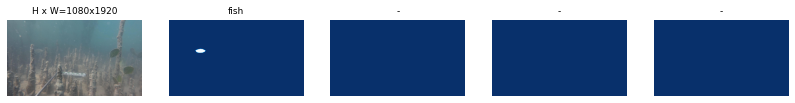

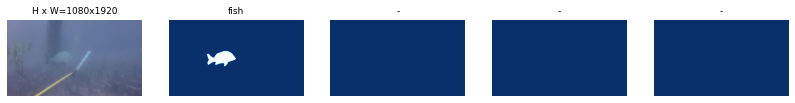

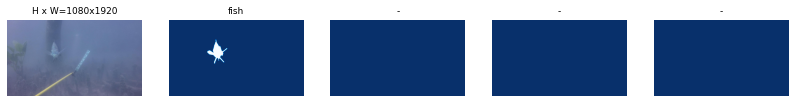

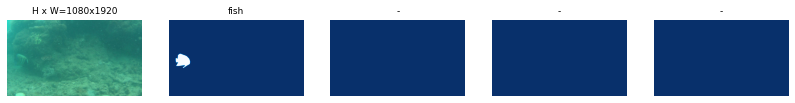

In [ ]:
# Load image samples
display_image_samples(dataset_train)

In [ ]:
# Load Configuration
config = CustomConfig(class_number)

#config.display()
model = load_training_model(config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
/content/Mask_RCNN_withRW/mask_rcnn_coco.h5


Training

In [ ]:
# Start Training (This operation might take a long time)
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/Mask_RCNN_withRW/logs/object20220214T0935/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_

(Optional): if you want to infer results from the already trained model you have to download the .h5 file (uploaded on DropBox)


In [ ]:
## optional if you do not want to train the model (previous cell) and you only want to infer
!wget "https://www.dropbox.com/s/evfvlt3eitqpnkr/mask_rcnn_object_0005.h5"

--2022-02-12 18:21:27--  https://www.dropbox.com/s/evfvlt3eitqpnkr/mask_rcnn_object_0005.h5
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/evfvlt3eitqpnkr/mask_rcnn_object_0005.h5 [following]
--2022-02-12 18:21:27--  https://www.dropbox.com/s/raw/evfvlt3eitqpnkr/mask_rcnn_object_0005.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce608702a195fd4d602ecd03623.dl.dropboxusercontent.com/cd/0/inline/BfkfYYQUB5_Z-41lI-y_OygKlB9DKMcdcH_1P6UQlGKk04b8yy39HQvD5AafeJMdZG9tg43lQzFEPje4EywnyvXlLTUpGGtk1Mk67FZbSsdF9PLfRuzUjjEoI97DWYtwPDCaCyKTTJ7K_Zxk0ORUdFoN/file# [following]
--2022-02-12 18:21:27--  https://uce608702a195fd4d602ecd03623.dl.dropboxusercontent.com/cd/0/inline/BfkfYYQUB5_Z-41lI-y_OygKlB9DKMcdcH_1P6UQlGKk04b8yy3

In [ ]:
from visualize import random_colors, get_mask_contours, draw_mask

In [ ]:
list = os.listdir("/content/drive/MyDrive/TER-final/testImages")
number_files = len(list)
print(number_files)

21


In [ ]:
loc = "/content/drive/MyDrive/TER-final/testImages" 

names=[] 

for images in os.listdir(loc): 
    file = loc+"/"+images
    filestr = file.split("/")
    names.append(filestr[6])

In [ ]:
## Load Image

#test_model, inference_config = load_inference_model(1, "/content/mask_rcnn_object_0005.h5") ## uncomment this line and comment the next one if you did not train the model and you want to use the downloaded weights of the previous cell
test_model, inference_config = load_inference_model(1, "/content/Mask_RCNN_withRW/logs/object20220214T0935/mask_rcnn_object_0005.h5") ##use the path for the last .h5 file stored in "Mask_RCNN_withRW/logs/objectYYYYMMDDTXXXX/mask_rcnn_object_0005.h5"
for images in range(number_files):

    print("=========================")
    print("Processing image: ", images)
    
    img = cv2.imread("/content/drive/MyDrive/TER-final/testImages/"+names[images])
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Detect results
    r = test_model.detect([image])[0]
    colors = random_colors(80)
    
    ## Save picture with colored mask in the folder "outputImagesWithMasksColors"
    object_count = len(r["class_ids"])

    
    for i in range(object_count):
      # 1. Mask
      mask = r["masks"][:, :, i]
      contours = get_mask_contours(mask)

      for cnt in contours:
          cv2.polylines(img, [cnt], True, colors[i], 2)
          img = draw_mask(img, [cnt], colors[i])

    cv2.imwrite(os.path.join("/content/drive/MyDrive/TER-final/outputImagesWithMasksColors" , names[images]), img)
    
    ## Create the mask in black and white
    height, width, channels = image.shape
    image_shape = height, width
    
    ## We want a black and white image to pass to the annotation script
    black_image = np.zeros((height,width,3), np.uint8)
    white = (255, 255, 255)
    
    ## Save the mask in B&W in the folder "outputImagesWithMasksBlackAndWhite"
    object_count = len(r["class_ids"])
    
    for i in range(object_count):
      # 1. Mask
      mask = r["masks"][:, :, i]
      contours = get_mask_contours(mask)
      for cnt in contours:

          black_image = draw_mask(black_image, [cnt], white)
          cv2.polylines(black_image, [cnt], True, white, 2)
          cv2.fillPoly(black_image, [cnt], white)
          black_image = draw_mask(black_image, [cnt], white)
          cv2.polylines(black_image, [cnt], True, white, 2)
    
    imgAux = names[images].split(".")
    cv2.imwrite(os.path.join("/content/drive/MyDrive/TER-final/outputImagesWithMasksBlackAndWhite" , imgAux[0]+".png"), black_image)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/Mask_RCNN_withRW/logs/object20220214T0935/mask_rcnn_object_0005.h5
Re-starting from epoch 5
Processing image:  0
Processing image:  1
Processing image:  2
Processing image:  3
Processing image:  4
Processing image:  5
Processing image:  6
Processing image:  7
Processing image:  8
Processing image:  9
Processing image:  10
Processing image:  11
Processing image:  12
Processing image:  13
Processing image:  14
Processing image:  15
Processing image:  16
Processing image:  17
Processing image:  18
Processing image:  19
Processing image:  20


In [ ]:
from PIL import Image
import numpy as np
from skimage import measure
from shapely.geometry import Polygon, MultiPolygon 
import os
import json

def create_sub_masks(mask_image, width, height):
    # Initialize a dictionary of sub-masks indexed by RGB colors
    sub_masks = {}
    for x in range(width):
        for y in range(height):
            # Get the RGB values of the pixel
            pixel = mask_image.getpixel((x,y))[:3]

            # Check to see if we have created a sub-mask...
            pixel_str = str(pixel)
            sub_mask = sub_masks.get(pixel_str)
            if sub_mask is None:
               # Create a sub-mask (one bit per pixel) and add to the dictionary
                # Note: we add 1 pixel of padding in each direction
                # because the contours module doesn"t handle cases
                # where pixels bleed to the edge of the image
                sub_masks[pixel_str] = Image.new("1", (width+2, height+2))

            # Set the pixel value to 1 (default is 0), accounting for padding
            sub_masks[pixel_str].putpixel((x+1, y+1), 1)

    return sub_masks

def create_sub_mask_annotation(sub_mask):
    # Find contours (boundary lines) around each sub-mask
    # Note: there could be multiple contours if the object
    # is partially occluded. (E.g. an elephant behind a tree)
    contours = measure.find_contours(np.array(sub_mask), 0.5, positive_orientation="low")

    polygons = []
    segmentations = []
    for contour in contours:
        # Flip from (row, col) representation to (x, y)
        # and subtract the padding pixel
        for i in range(len(contour)):
            row, col = contour[i]
            contour[i] = (col - 1, row - 1)

        # Make a polygon and simplify it
        poly = Polygon(contour)
        poly = poly.simplify(1.0, preserve_topology=False)
        
        if(poly.is_empty):
            # Go to next iteration, dont save empty values in list
            continue

        polygons.append(poly)

        segmentation = np.array(poly.exterior.coords).ravel().tolist()
        segmentations.append(segmentation)
    
    return polygons, segmentations

def create_category_annotation(category_dict):
    category_list = []

    for key, value in category_dict.items():
        category = {
            "supercategory": key,
            "id": value,
            "name": key
        }
        category_list.append(category)

    return category_list

def create_image_annotation(file_name, width, height, image_id):
    images = {
        "file_name": file_name,
        "height": height,
        "width": width,
        "id": image_id
    }

    return images

def create_annotation_format(polygon, segmentation, image_id, category_id, annotation_id):
    min_x, min_y, max_x, max_y = polygon.bounds
    width = max_x - min_x
    height = max_y - min_y
    bbox = (min_x, min_y, width, height)
    area = polygon.area

    annotation = {
        "segmentation": segmentation,
        "area": area,
        "iscrowd": 0,
        "image_id": image_id,
        "bbox": bbox,
        "category_id": category_id,
        "id": annotation_id
    }

    return annotation

def get_coco_json_format():
    # Standard COCO format 
    coco_format = {
        "info": {},
        "licenses": [],
        "images": [{}],
        "categories": [{}],
        "annotations": [{}]
    }

    return coco_format

In [ ]:
import glob

# Label ids of the dataset
category_ids = {
    "fish": 1
}

# Define which colors match which categories in the images
category_colors = {
    "(255, 255, 255)": 1 # Fish
}

# Define the ids that are a multiplolygon. In our case: wall, roof and sky
multipolygon_ids = [2, 5, 6]

# Get "images" and "annotations" info 
def images_annotations_info(maskpath):
    # This id will be automatically increased as we go
    annotation_id = 0
    image_id = 0
    annotations = []
    images = []
    
    n_images = len(glob.glob(maskpath + "*.png"))
    print("n_images", n_images)
    cont = 0
    for mask_image in glob.glob(maskpath + "*.png"):
        cont = cont + 1
        print("=========================")
        print("Image", cont, "of", n_images)
        # The mask image is *.jpg but the original image is *.png.
        # We make a reference to the original file in the COCO JSON file
        original_file_name = os.path.basename(mask_image).split(".")[0] + ".jpg"
        
        print("name", original_file_name)

        # Open the image and (to be sure) we convert it to RGB
        mask_image_open = Image.open(mask_image).convert("RGB")
        w, h = mask_image_open.size
        
        # "images" info 
        image = create_image_annotation(original_file_name, w, h, image_id)
        images.append(image)

        sub_masks = create_sub_masks(mask_image_open, w, h)
        for color, sub_mask in sub_masks.items():
           
            if color == '(255, 255, 255)':
                category_id = category_colors[color]

                # "annotations" info
                polygons, segmentations = create_sub_mask_annotation(sub_mask)

                # Check if we have classes that are a multipolygon
                if category_id in multipolygon_ids:
                    # Combine the polygons to calculate the bounding box and area
                    multi_poly = MultiPolygon(polygons)
                                
                    annotation = create_annotation_format(multi_poly, segmentations, image_id, category_id, annotation_id)

                    annotations.append(annotation)
                    annotation_id += 1
                else:
                    for i in range(len(polygons)):
                        # Cleaner to recalculate this variable
                        segmentation = [np.array(polygons[i].exterior.coords).ravel().tolist()]
                    
                        annotation = create_annotation_format(polygons[i], segmentation, image_id, category_id, annotation_id)
                    
                        annotations.append(annotation)
                        annotation_id += 1
        image_id += 1              
                
    return images, annotations, annotation_id

if __name__ == "__main__":
    # Get the standard COCO JSON format
    coco_format = get_coco_json_format()
    
    for keyword in ["annotations"]:
        mask_path = "/content/drive/MyDrive/TER-final/outputImagesWithMasksBlackAndWhite/"
        
        # Create category section
        coco_format["categories"] = create_category_annotation(category_ids)
    
        # Create images and annotations sections
        coco_format["images"], coco_format["annotations"], annotation_cnt = images_annotations_info(mask_path)

        with open("/content/drive/MyDrive/TER-final/testAnnotations/testAnnotations.json","w") as outfile:
            json.dump(coco_format, outfile)
        
        print("Created %d annotations for images in folder: %s" % (annotation_cnt, mask_path))

n_images 21
Image 1 of 21
name 9852_Acanthopagrus_palmaris_f000007.jpg
Image 2 of 21
name 9852_Acanthopagrus_palmaris_f000003.jpg
Image 3 of 21
name 9852_Acanthopagrus_palmaris_f000002.jpg
Image 4 of 21
name 9852_Acanthopagrus_palmaris_f000014.jpg
Image 5 of 21
name 9852_Acanthopagrus_palmaris_f000006.jpg
Image 6 of 21
name 9852_Acanthopagrus_palmaris_f000017.jpg
Image 7 of 21
name 9852_Acanthopagrus_palmaris_f000004.jpg
Image 8 of 21
name 9852_Acanthopagrus_palmaris_f000013.jpg
Image 9 of 21
name 9852_Acanthopagrus_palmaris_f000001.jpg
Image 10 of 21
name 9852_Acanthopagrus_palmaris_f000016.jpg
Image 11 of 21
name 9852_Acanthopagrus_palmaris_f000011.jpg
Image 12 of 21
name 9852_Acanthopagrus_palmaris_f000015.jpg
Image 13 of 21
name 9852_Acanthopagrus_palmaris_f000012.jpg
Image 14 of 21
name 9852_Acanthopagrus_palmaris_f000005.jpg
Image 15 of 21
name 9852_Acanthopagrus_palmaris_f000019.jpg
Image 16 of 21
name 9852_Acanthopagrus_palmaris_f000009.jpg
Image 17 of 21
name 9852_Acanthopagru

In [ ]:
## now we can delete the images contained in testImages folder (not the folder itself) because they became part of the trainImages
!rm -r "/content/drive/MyDrive/TER-final/testImages/"
!mkdir "/content/drive/MyDrive/TER-final/testImages"


In [ ]:
# you can copy the weights file (.h5) in the TER-final folder in order to have your weights file directly in your Google Drive
# before remove the old versions of the weights (from other exectutions of the script)
!rm -r "/content/drive/MyDrive/TER-final/logs"

# copy the new weights files
!cp -r "/content/Mask_RCNN_withRW/logs" "/content/drive/MyDrive/TER-final"

rm: cannot remove '/content/drive/MyDrive/TER-final/logs': No such file or directory
